# Logistic regression for a binary classification with a regularization

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
from matplotlib import cm

### 1. Training Data

In [9]:
data = pd.read_csv("training.txt", names=['x','y','label'])

In [10]:
data

,x,y,label
0,0.76090,0.116706,0.0
1,0.99777,0.082345,0.0
2,1.02459,0.291094,0.0
3,1.07755,0.091764,0.0
4,0.91385,0.054629,0.0
...,...,...,...
195,1.00000,1.000000,1.0
196,1.00000,1.000000,1.0
197,1.00000,1.000000,1.0
198,1.00000,1.000000,1.0


### 2. Testing Data

In [11]:
test_data = pd.read_csv("testing.txt", names=['x','y','label'])

In [12]:
test_data

,x,y,label
0,1.00726,0.268272,0.0
1,0.87378,0.204539,0.0
2,0.98254,0.245526,0.0
3,1.05977,0.265070,0.0
4,0.74250,0.228713,0.0
...,...,...,...
195,1.00000,1.000000,1.0
196,1.00000,1.000000,1.0
197,1.00000,1.000000,1.0
198,1.00000,1.000000,1.0


- 라벨값을 저장하고 $g(x,y,\theta)$ 함수를 정의하겠습니다.

In [26]:
data_1 = data[data['label'] == 1]
dataX_1 = data_1['x']
dataY_1 = data_1['y']

data_0 = data[data['label'] == 0]
dataX_0 = data_0['x']
dataY_0 = data_0['y']

test_data_1 = test_data[test_data['label'] == 1]
test_dataX_1 = test_data_1['x']
test_dataY_1 = test_data_1['y']

test_data_0 = test_data[test_data['label'] == 0]
test_dataX_0 = test_data_0['x']
test_dataY_0 = test_data_0['y']

In [14]:
label = data['label']

In [16]:
train_data = pd.DataFrame()
for i in range(10):
    for j in range(10):
        name = "x" + str(i) + "y" + str(j)
        new_data[name] = data['x'] ** i * data['y'] ** j

- $x,y$를 순서대로 곱하여 다음과 같은 데이터를 만들었습니다. $x^0y^0$은 상수항이기에 데이터에서 제외하고 따로 관리하여 계산하겠습니다.

In [17]:
new_data = new_data.drop('x0y0', axis=1)
new_data

,x0y1,x0y2,x0y3,x0y4,x0y5,x0y6,x0y7,x0y8,x0y9,x1y0,...,x9y0,x9y1,x9y2,x9y3,x9y4,x9y5,x9y6,x9y7,x9y8,x9y9
0,0.116706,0.013620,0.001590,0.000186,2.165069e-05,2.526773e-06,2.948903e-07,3.441556e-08,4.016514e-09,0.76090,...,0.085496,0.009978,0.001164,0.000136,0.000016,1.851058e-06,2.160302e-07,2.521209e-08,2.942410e-09,3.433978e-10
1,0.082345,0.006781,0.000558,0.000046,3.785956e-06,3.117530e-07,2.567118e-08,2.113883e-09,1.740668e-10,0.99777,...,0.980108,0.080707,0.006646,0.000547,0.000045,3.710646e-06,3.055516e-07,2.516053e-08,2.071833e-09,1.706043e-10
2,0.291094,0.084736,0.024666,0.007180,2.090092e-03,6.084129e-04,1.771053e-04,5.155426e-05,1.500713e-05,1.02459,...,1.244374,0.362230,0.105443,0.030694,0.008935,2.600856e-03,7.570933e-04,2.203852e-04,6.415279e-05,1.867449e-05
3,0.091764,0.008421,0.000773,0.000071,6.506846e-06,5.970966e-07,5.479219e-08,5.027971e-09,4.613886e-10,1.07755,...,1.958560,0.179726,0.016492,0.001513,0.000139,1.274405e-05,1.169450e-06,1.073138e-07,9.847584e-09,9.036573e-10
4,0.054629,0.002984,0.000163,0.000009,4.865555e-07,2.658024e-08,1.452063e-09,7.932531e-11,4.333495e-12,0.91385,...,0.444503,0.024283,0.001327,0.000072,0.000004,2.162751e-07,1.181498e-08,6.454455e-10,3.526030e-11,1.926249e-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
196,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
197,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
198,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


- 필요 함수들을 선언하겠습니다.

In [18]:
def logistic(x):
    return 1 / (1 + math.e ** -x)

In [19]:
def check_accuracy(result):
    match = 0
    for i in range(len(result)):
        if result[i] < 0.5 and label[i] == 0:
            match += 1
        if result[i] >= 0.5 and label[i] == 1:
            match += 1
    return match/len(label)

In [20]:
def mesh():
    x = np.arange(-1,1,0.001)
    y = np.arange(-1,1,0.001)
    return np.meshgrid(x,y)

- 람다값은 0.0001, 0.01, 1 입니다. 그리고 결과값을 리스트들에 담에 저장하겠습니다.

In [21]:
ephochs = 100
m = len(label)
learning_rate = 0.1
new_data_array = np.array(new_data)
lamda_list = [0.0001, 0.01, 1]
Loss_list = []
accuracy_list = []
result = []

In [22]:
for idx, lamda in enumerate(lamda_list):
    Loss = []
    accuracy = []
    coef = np.zeros(99)
    coef_list = np.zeros((10,10)).tolist()
    t0 = 0

    for i in range(ephochs):  
        if i % 10 == 0:
            print(str(i) + " times running..")
        h = np.array(logistic(new_data.dot(coef) + t0))
        Logistic_cost = - (1/m) * np.sum(label * np.log(h) + (1-label) * np.log(1-h)) + lamda * (t0 ** 2 + np.sum(coef ** 2))
        
        Loss.append(Logistic_cost)
        accuracy.append(check_accuracy(h))   
        
        t0 = t0 - learning_rate * np.sum((h - label) / m)
        for i in range(1, len(coef)):
            coef[i] = coef[i] - learning_rate * (np.sum((h - label) * new_data_array[:,i] / m) + lamda * coef[i])
    
    Loss_list.append(Loss)
    accuracy_list.append(accuracy)

0 times running..


C:\Users\alber\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


10 times running..
20 times running..
30 times running..
40 times running..
50 times running..
60 times running..
70 times running..
80 times running..
90 times running..
0 times running..
10 times running..
20 times running..
30 times running..
40 times running..
50 times running..
60 times running..
70 times running..
80 times running..
90 times running..
0 times running..
10 times running..
20 times running..
30 times running..
40 times running..
50 times running..
60 times running..
70 times running..
80 times running..
90 times running..


# [Output]

### 1. Plot the training data

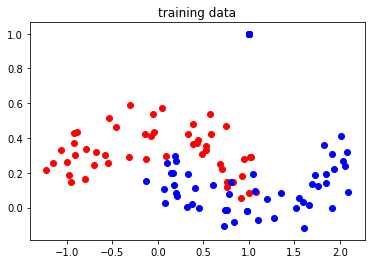

In [31]:
plt.scatter(dataX_0, dataY_0, color ='r')
plt.scatter(dataX_1, dataY_1, color ='b')
plt.title('training data')
plt.show()

### 2. Plot the testing data

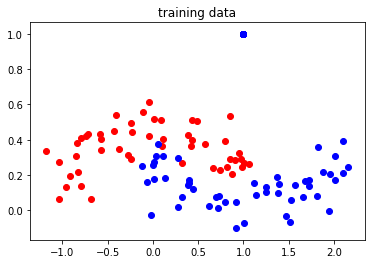

In [32]:
plt.scatter(test_dataX_0, test_dataY_0, color ='r')
plt.scatter(test_dataX_1, test_dataY_1, color ='b')
plt.title('training data')
plt.show()

### 3. Plot the learning curve with λ=0.00001

### 4. Plot the learning curve with λ=0.0001

### 5. Plot the learning curve with λ=0.001

### 6. Plot the learning curve with λ=0.01

### 7. Plot the learning curve with λ=0.1

## 2. Plot the training error with varying regularization parameters

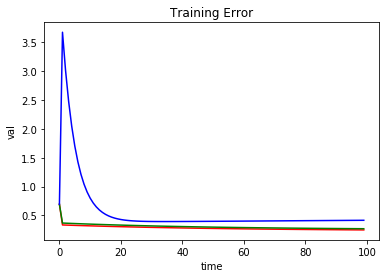

In [24]:
color = ['r','g','b']
for idx, loss in enumerate(Loss_list):
    plt.plot([i for i in range(len(loss))], loss, c = color[idx])
plt.title('Training Error')
plt.xlabel('time')
plt.ylabel('val')
plt.show()

## 3. Display the values of the chosen regularization parameters

In [25]:
print('\033[31m' +'over-fitting ' + str(lamda_list[0]) + '\033[0m') 
print('\033[32m' +'just-right '+ str(lamda_list[1]) + '\033[0m') 
print('\033[34m' +'under-fitting ' + str(lamda_list[2]) + '\033[0m') 


over-fitting 0.0001
just-right 0.01
under-fitting 1


## 4. Plot the training accuracy with varying regularization parameters

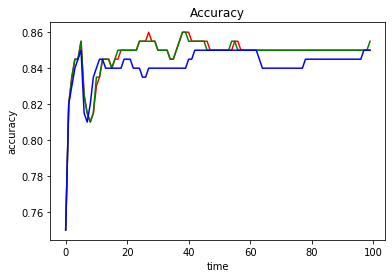

In [26]:
color = ['r','g','b']
for idx, ac in enumerate(accuracy_list):
    plt.plot([i for i in range(len(ac))], ac, c = color[idx])
plt.title('Accuracy')
plt.xlabel('time')
plt.ylabel('accuracy')
plt.show()

## 5. Display the final training accuracy with varying regularization parameters

In [27]:
print('\033[31m' + "over-fitting " +str(accuracy_list[0][-1]) + '\033[0m') 
print('\033[32m' +'just-right '+ str(accuracy_list[1][-1]) + '\033[0m') 
print('\033[34m' +'under-fitting '+  str(accuracy_list[2][-1]) + '\033[0m') 

over-fitting 0.85
just-right 0.855
under-fitting 0.85


## 6. Plot the optimal classifier with varying regularization parameters superimposed on the training data



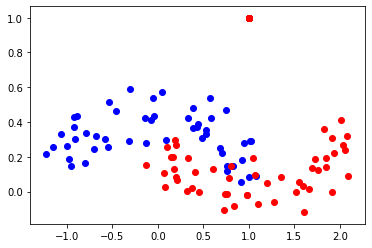

In [28]:
color = ['r','g','b']
for idx, r in enumerate(result):    
    plt.contour(r[0],r[1],r[2],[0] ,colors=color[idx])

plt.scatter(dataX_0, dataY_0, color ='b')
plt.scatter(dataX_1, dataY_1, color ='r')
plt.show()